In [1]:
## Preliminary arrangements: which companies and dates to choose?
import pandas as pd
import numpy as np
dfsym=pd.read_csv('data/companylist.csv',float_precision='high')
dfsym=dfsym[dfsym['MarketCap'] > 2000000000]
companies=dfsym['Symbol'].tolist()
dfsp500 = pd.read_csv('data/SANDP500.csv')
companies=dfsp500['Symbol'].tolist()
companies=np.random.choice(companies, size=500, replace=False)

In [22]:
import glob
import os
path = r'data/NASDAQ'                     # use your path
all_files = glob.glob(os.path.join(path, "*.txt"))     
df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df_NAS   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df_NAS=concatenated_df_NAS[concatenated_df_NAS['<ticker>'].isin(companies)]

path = r'data/NYSE'                     # use your path
all_files = glob.glob(os.path.join(path, "*.txt"))     
df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df_NYS   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df_NYS=concatenated_df_NYS[concatenated_df_NYS['<ticker>'].isin(companies)]

concatenated_df = pd.concat([concatenated_df_NAS,concatenated_df_NYS])
#concatenated_df['pct_change'] = (((concatenated_df['<close>'] - concatenated_df['<open>'])/concatenated_df['<open>']))
concatenated_df['pct_change'] = np.log(concatenated_df['<close>']) - np.log(concatenated_df['<open>'])

In [23]:
col_p = 'pct_change'
concatenated_df.columns = ['ticker','date','open','high','low','close','vol','pct_change']

concatenated_df=concatenated_df[concatenated_df['ticker'].isin(companies)]
concatenated_df=concatenated_df.merge(dfsp500,left_on='ticker',right_on='Symbol')
#concatenated_df['ticker'] = concatenated_df['Sector'].str[0:3] + '-' + concatenated_df['ticker']
concatenated_df['ticker'] = concatenated_df['ticker']
df_price = concatenated_df[['ticker','date',col_p]]
df_price=df_price.drop_duplicates( keep='last')
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y%m%d', errors='ignore')
df_price.set_index(['date','ticker'],inplace=True)
df_price=df_price.unstack()[col_p]
df_price.reset_index(inplace=True)
df_price.fillna(method='bfill',inplace=True)
df_price.fillna(method='ffill',inplace=True)

In [ ]:
import scipy.signal
for key in df_price.columns:
    if key not in companies:
        continue
    try:
        df_price[key] = pd.Series(scipy.signal.detrend(df_price[key]))
    except:
        print (key)
df_price.set_index('date',inplace=True)

In [50]:
df_price.iloc[1:100]

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2007-01-02,0.000000,0.026778,0.000000,0.000000,0.005711,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.063099,0.000000,0.000000,0.021176,0.000000,-0.015678
2007-01-03,-0.019917,0.026778,-0.003647,-0.029280,0.005711,0.022591,0.002863,-0.004662,-0.019842,-0.002737,...,-0.011790,-0.028598,-0.002331,-0.005900,0.063099,-0.009328,0.001871,0.021176,0.008235,-0.015678
2007-01-04,0.003202,0.026778,0.005039,0.018974,0.005711,0.001297,0.016977,0.029462,0.023297,0.017208,...,0.020904,-0.015420,0.003330,-0.000592,0.063099,0.046112,0.000000,0.021176,0.005780,-0.015678
2007-01-05,-0.006141,0.026778,-0.019231,-0.008433,0.005711,-0.008275,0.000000,-0.001907,-0.003931,-0.007240,...,-0.012036,0.010845,-0.000332,-0.009518,0.063099,0.038212,-0.008726,0.021176,0.001326,-0.015678
2007-01-08,-0.000294,0.026778,-0.000569,-0.005717,0.005711,0.005180,0.005205,0.018991,0.000989,0.003310,...,-0.003727,-0.016789,0.005636,0.018393,0.063099,0.007911,0.001724,0.021176,0.004459,-0.015678
2007-01-09,-0.002056,0.026778,0.005092,0.068400,0.005711,-0.006459,0.007351,0.000539,-0.021716,-0.001203,...,-0.010367,0.003335,0.002979,-0.003531,0.063099,-0.015114,0.003783,0.021176,0.004314,-0.015678
2007-01-10,-0.010038,0.026778,0.007353,0.023467,0.005711,0.004740,0.003379,0.014024,0.001786,0.022728,...,0.024088,-0.011485,0.012242,-0.000589,0.063099,0.043439,-0.004241,0.021176,0.009796,-0.015678
2007-01-11,-0.003850,0.026778,0.021661,-0.001460,0.005711,0.014064,-0.001786,-0.001344,0.012109,0.002068,...,0.013855,-0.000141,0.006184,0.016925,0.063099,0.015183,0.015114,0.021176,0.004922,-0.015678
2007-01-12,-0.002081,0.026778,-0.001932,0.000311,0.005711,0.007629,0.007561,0.021020,0.007788,0.011557,...,0.012574,0.020158,0.027097,-0.013431,0.063099,0.016088,-0.002169,0.021176,-0.000120,-0.015678


In [24]:
corr_dict = {}
df_price.set_index('date',inplace=True)
for i in range(2007,2017):
        yfs = str(i) + '0101'
        yfe = str(i) + '1231'
        corr_dict[i]=df_price.loc[yfs:yfe].corr(method='pearson')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

f, ax = plt.subplots(111)
corr = corr_dict[2011]
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

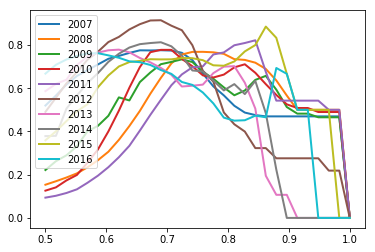

In [29]:
import networkx as nx
import community
import matplotlib.pyplot as plt
%matplotlib inline
def get_modularity(y,threshold):
    df_price_corr = corr_dict[y]
    elist = []
    outdict=df_price_corr.to_dict()
    for i in outdict.keys():
        for j in outdict[i].keys():    
            if (outdict[i][j]) > threshold :
                if i == j :
                    continue
                yfs = int(str(y)+'0101')
                yfe =  int(str(y)+'1231')
                if i < j:
                    elist.append([i,j,dict(weight=(outdict[i][j]),start=y,end=y+1)])
                    #elist.append([i,j,dict(start=y,end=y+1)])
                else:
                    None
    G=nx.Graph()
    G.add_edges_from(elist)
    partition = community.best_partition(G)
    try:
        m = community.modularity(partition, G)
    except:
        m = 0 
    return m
# This will be our list of fractions to run the simulation over
fractions = np.linspace(0.5, 1.0, 30)
M_list = {}
for y in corr_dict.keys():
    M_list[y] = [ get_modularity(y, frac)  for frac in fractions ]
    plt.plot(fractions, M_list[y], lw=2)
plt.legend(list(M_list.keys()), loc='upper left')
plt.show()

In [30]:
T_val = {}
for y in M_list.keys():
    val, idx = max((val, idx) for (idx, val) in enumerate(M_list[y]))
    T_val[y] = fractions[idx]
    print (fractions[idx])

0.689655172414
0.758620689655
0.724137931034
0.689655172414
0.844827586207
0.689655172414
0.620689655172
0.689655172414
0.862068965517
0.586206896552


In [31]:
elist_dict={}
for y in corr_dict.keys():
    df_price_corr = corr_dict[y]
    threshold = T_val[y]
    elist = []
    outdict=df_price_corr.to_dict()
    for i in outdict.keys():
        #threshold = df_price_corr[i].quantile(0.95)
        #print ( i + str(threshold))
        for j in outdict[i].keys():    
            if abs(outdict[i][j]) > threshold :
                if i == j :
                    continue
                yfs = int(str(y)+'0101')
                yfe =  int(str(y)+'1231')
                if i < j:
                    elist.append([i,j,dict(weight=abs(outdict[i][j]),start=y,end=y+1)])
                    #elist.append([i,j,dict(start=y,end=y+1)])
                else:
                    None
    print (len(elist))
    elist_dict[y] = elist

588
722
628
702
64
164
561
393
16
1396


In [48]:
# Constructing a graph
import networkx as nx
import community
G_dict = {}
for y in elist_dict.keys():
    G=nx.Graph()
    elist = elist_dict[y]
    G.add_edges_from(elist)
    values = dfsp500.set_index('Symbol').to_dict(orient='dict')['Sector']
    for node, value in values.items():
        try:
            G.node[node]['Sector'] = value
        except:
            #name = (value[0:3] + '-' + node)
            #G.add_node(name,Sector=value)
            None
    partition = community.best_partition(G)
    
    deg_cent=dict((k,float(v)) for k,v in nx.degree_centrality(G).items())
    #katz_cent=nx.katz_centrality(G)
    #eigen_cent= dict((k,float(v)) for k,v in nx.eigenvector_centrality(G).items()) 
    close_cent= dict((k,float(v)) for k,v in nx.closeness_centrality(G).items())  
    betw_cent= dict((k,float(v)) for k,v in nx.betweenness_centrality(G).items()) 
    nx.set_node_attributes(G, "community", partition)  
    nx.set_node_attributes(G, "degree", deg_cent)
    #nx.set_node_attributes(G, "katz", katz_cent)
    #nx.set_node_attributes(G, "eigenvector", eigen_cent)
    nx.set_node_attributes(G, "closeness", close_cent)
    nx.set_node_attributes(G, "betweenness", betw_cent)
    nx.set_node_attributes(G, 'start',y)
    nx.set_node_attributes(G, 'end',y+1)
    #G.remove_nodes_from(nx.isolates(G)) 
    #T = nx.minimum_spanning_tree(G)
    T = G
    G_dict[y] = T

In [49]:
df_list = []
for k in G_dict.keys():
    G = G_dict[k]
    a = G.node
    df_list.append(pd.DataFrame(a).T.reset_index())
attrib_df = pd.concat(df_list)
attrib_df.groupby(by=['start','community','Sector'])['community'].count().unstack()

Sector           Consumer Discretionary  Consumer Staples  Energy  Financials  \
start community                                                                 
2007  0                             NaN               NaN     NaN         NaN   
      1                             NaN               NaN     NaN         NaN   
      2                             NaN               NaN     NaN        31.0   
      3                             8.0               1.0     1.0         4.0   
      4                             NaN               NaN     9.0         NaN   
      5                             NaN               NaN     NaN         NaN   
      6                             NaN               NaN     NaN         NaN   
      7                             1.0               NaN     1.0         NaN   
      8                             3.0               NaN     NaN         NaN   
      9                             NaN               NaN     2.0         NaN   
      10                            NaN               NaN     2.0         NaN   
2008  0                             NaN               NaN     NaN         NaN   
      1                             NaN               NaN     NaN         NaN   
      2                             1.0               NaN     NaN         NaN   
      3                             6.0               NaN     1.0         2.0   
      4                             NaN               NaN     NaN        28.0   
      5                             NaN               NaN     NaN         4.0   
      6                             NaN               NaN    28.0         NaN   
      7                             1.0               NaN     NaN         NaN   
      8                            12.0               NaN     NaN         NaN   
      9                             NaN               NaN     NaN         NaN   
      10                            2.0               NaN     NaN         NaN   
      11                            NaN               NaN     NaN         NaN   
      12                            NaN               4.0     NaN         NaN   
      13                            NaN               NaN     NaN         NaN   
      14                            NaN               NaN     NaN         NaN   
      15                            NaN               NaN     NaN         NaN   
      16                            NaN               NaN     NaN         NaN   
      17                            3.0               NaN     NaN         NaN   
      18                            NaN               NaN     NaN         NaN   
...                                 ...               ...     ...         ...   
2016  21                            NaN               NaN     NaN         4.0   
      22                            3.0               NaN     NaN         NaN   
      23                            2.0               NaN     NaN         NaN   
      24                            NaN               NaN     NaN         NaN   
      25                            2.0               NaN     NaN         NaN   
      26                            NaN               NaN     NaN         NaN   
      27                            NaN               NaN     NaN         NaN   
      28                            NaN               NaN     NaN         NaN   
      29                            NaN               NaN     NaN         NaN   
      30                            2.0               NaN     NaN         NaN   
      31                            NaN               NaN     NaN         NaN   
      32                            3.0               NaN     NaN         NaN   
      33                            NaN               NaN     NaN         NaN   
      34                            2.0               NaN     NaN         NaN   
      35                            NaN               NaN     NaN         NaN   
      36                            2.0               NaN     NaN         NaN   
      37                       

In [ ]:
# Constructing a graph
import networkx as nx
M=nx.MultiGraph()
for y in G_dict.keys():
    M.add_nodes_from(G_dict[y].nodes(data=True))
    M.add_edges_from(G_dict[y].edges(data=True))

In [ ]:
## A quick visualization: stock prices for each Dow Jones company
import matplotlib.pyplot as plt
import random as rn
import matplotlib as mpl
NUM_COLORS = len(companies)
cm = plt.get_cmap('gist_rainbow')
colors = [cm(4.*i/NUM_COLORS) for i in range(NUM_COLORS)]
rn.seed = len(companies)  # for choosing random colors
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(20, 20))
y=2007
for row in ax:
    for col in row:
        yfs = str(y) + '0101'
        yfe = str(y) + '1231'
        n = 0
        for i in df_price.columns:
            df_price.loc[yfs:yfe][i].plot(ax=col,color=colors[n])
            n = n + 1
        y = y + 1
plt.show()

In [ ]:
## Explore graph properties
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(20, 20))
y = 0
for row in ax:
    for col in row:
        try:
            T = G_dict[list(G_dict.keys())[y]]
        except:
            continue
        nodes, edges = T.order(), T.size()
        #print (nx.info(T))

        degree_sequence=sorted(nx.degree(T).values(),reverse=True) # degree sequence
        #print "Degree sequence", degree_sequence
        dmax=max(degree_sequence)

        col.loglog(degree_sequence,'b-',marker='o')
        col.set_title( str(list(G_dict.keys())[y]) )
        col.set_ylabel("degree")
        y = y + 1
plt.show()


In [ ]:
nx.write_gexf(M,'data/price-sp500.gexf')

In [ ]:
nx.write_gml(M,'data/price-sp500.gml')

In [ ]:
import numpy as np
max = 0
community_dict = {}
partition = {}
for j in np.linspace(start=0.5, stop=1.2, num=1):
    partition[str(j)] = community.best_partition(G_dict[2013],resolution=j)
    print (partition[str(j)])
    community_dict[str(j)] = max(partition[str(j)].values())

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/price-sp500.gexf')
root = tree.getroot()

In [ ]:
for element in root.iter("{http://www.gexf.net/1.1draft}node"):
    #print (element.attrib)
    noden = element.attrib['id']
    for child in element:
        for i in range(len(child)):
            child.remove(child[0])
        for y in G_dict.keys():
            T = G_dict[y]
            n = 0
            try:
                for att in T.node[noden]:
                    new = ET.Element("{http://www.gexf.net/1.1draft}attvalue")
                    new.set('for',str(n))
                    new.set('value',str(T.node[noden][att]))
                    new.set('start',str(y))
                    new.set('end',str(y+1))
                    child.append(new)
                    #print (T.node[noden][att])
                    n = n + 1
            except:
                continue

In [ ]:
tree.write('data/price-sp500-o.gexf')

In [46]:
for y in G_dict.keys():
    print (y)
    print (nx.info(G_dict[y]))
    #print (nx.average_shortest_path_length(G_dict[y]))

2007
Name: 
Type: Graph
Number of nodes: 112
Number of edges: 588
Average degree:  10.5000
2008
Name: 
Type: Graph
Number of nodes: 188
Number of edges: 722
Average degree:   7.6809
2009
Name: 
Type: Graph
Number of nodes: 177
Number of edges: 628
Average degree:   7.0960
2010
Name: 
Type: Graph
Number of nodes: 212
Number of edges: 702
Average degree:   6.6226
2011
Name: 
Type: Graph
Number of nodes: 39
Number of edges: 64
Average degree:   3.2821
2012
Name: 
Type: Graph
Number of nodes: 120
Number of edges: 164
Average degree:   2.7333
2013
Name: 
Type: Graph
Number of nodes: 207
Number of edges: 561
Average degree:   5.4203
2014
Name: 
Type: Graph
Number of nodes: 186
Number of edges: 393
Average degree:   4.2258
2015
Name: 
Type: Graph
Number of nodes: 27
Number of edges: 16
Average degree:   1.1852
2016
Name: 
Type: Graph
Number of nodes: 340
Number of edges: 1396
Average degree:   8.2118


/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


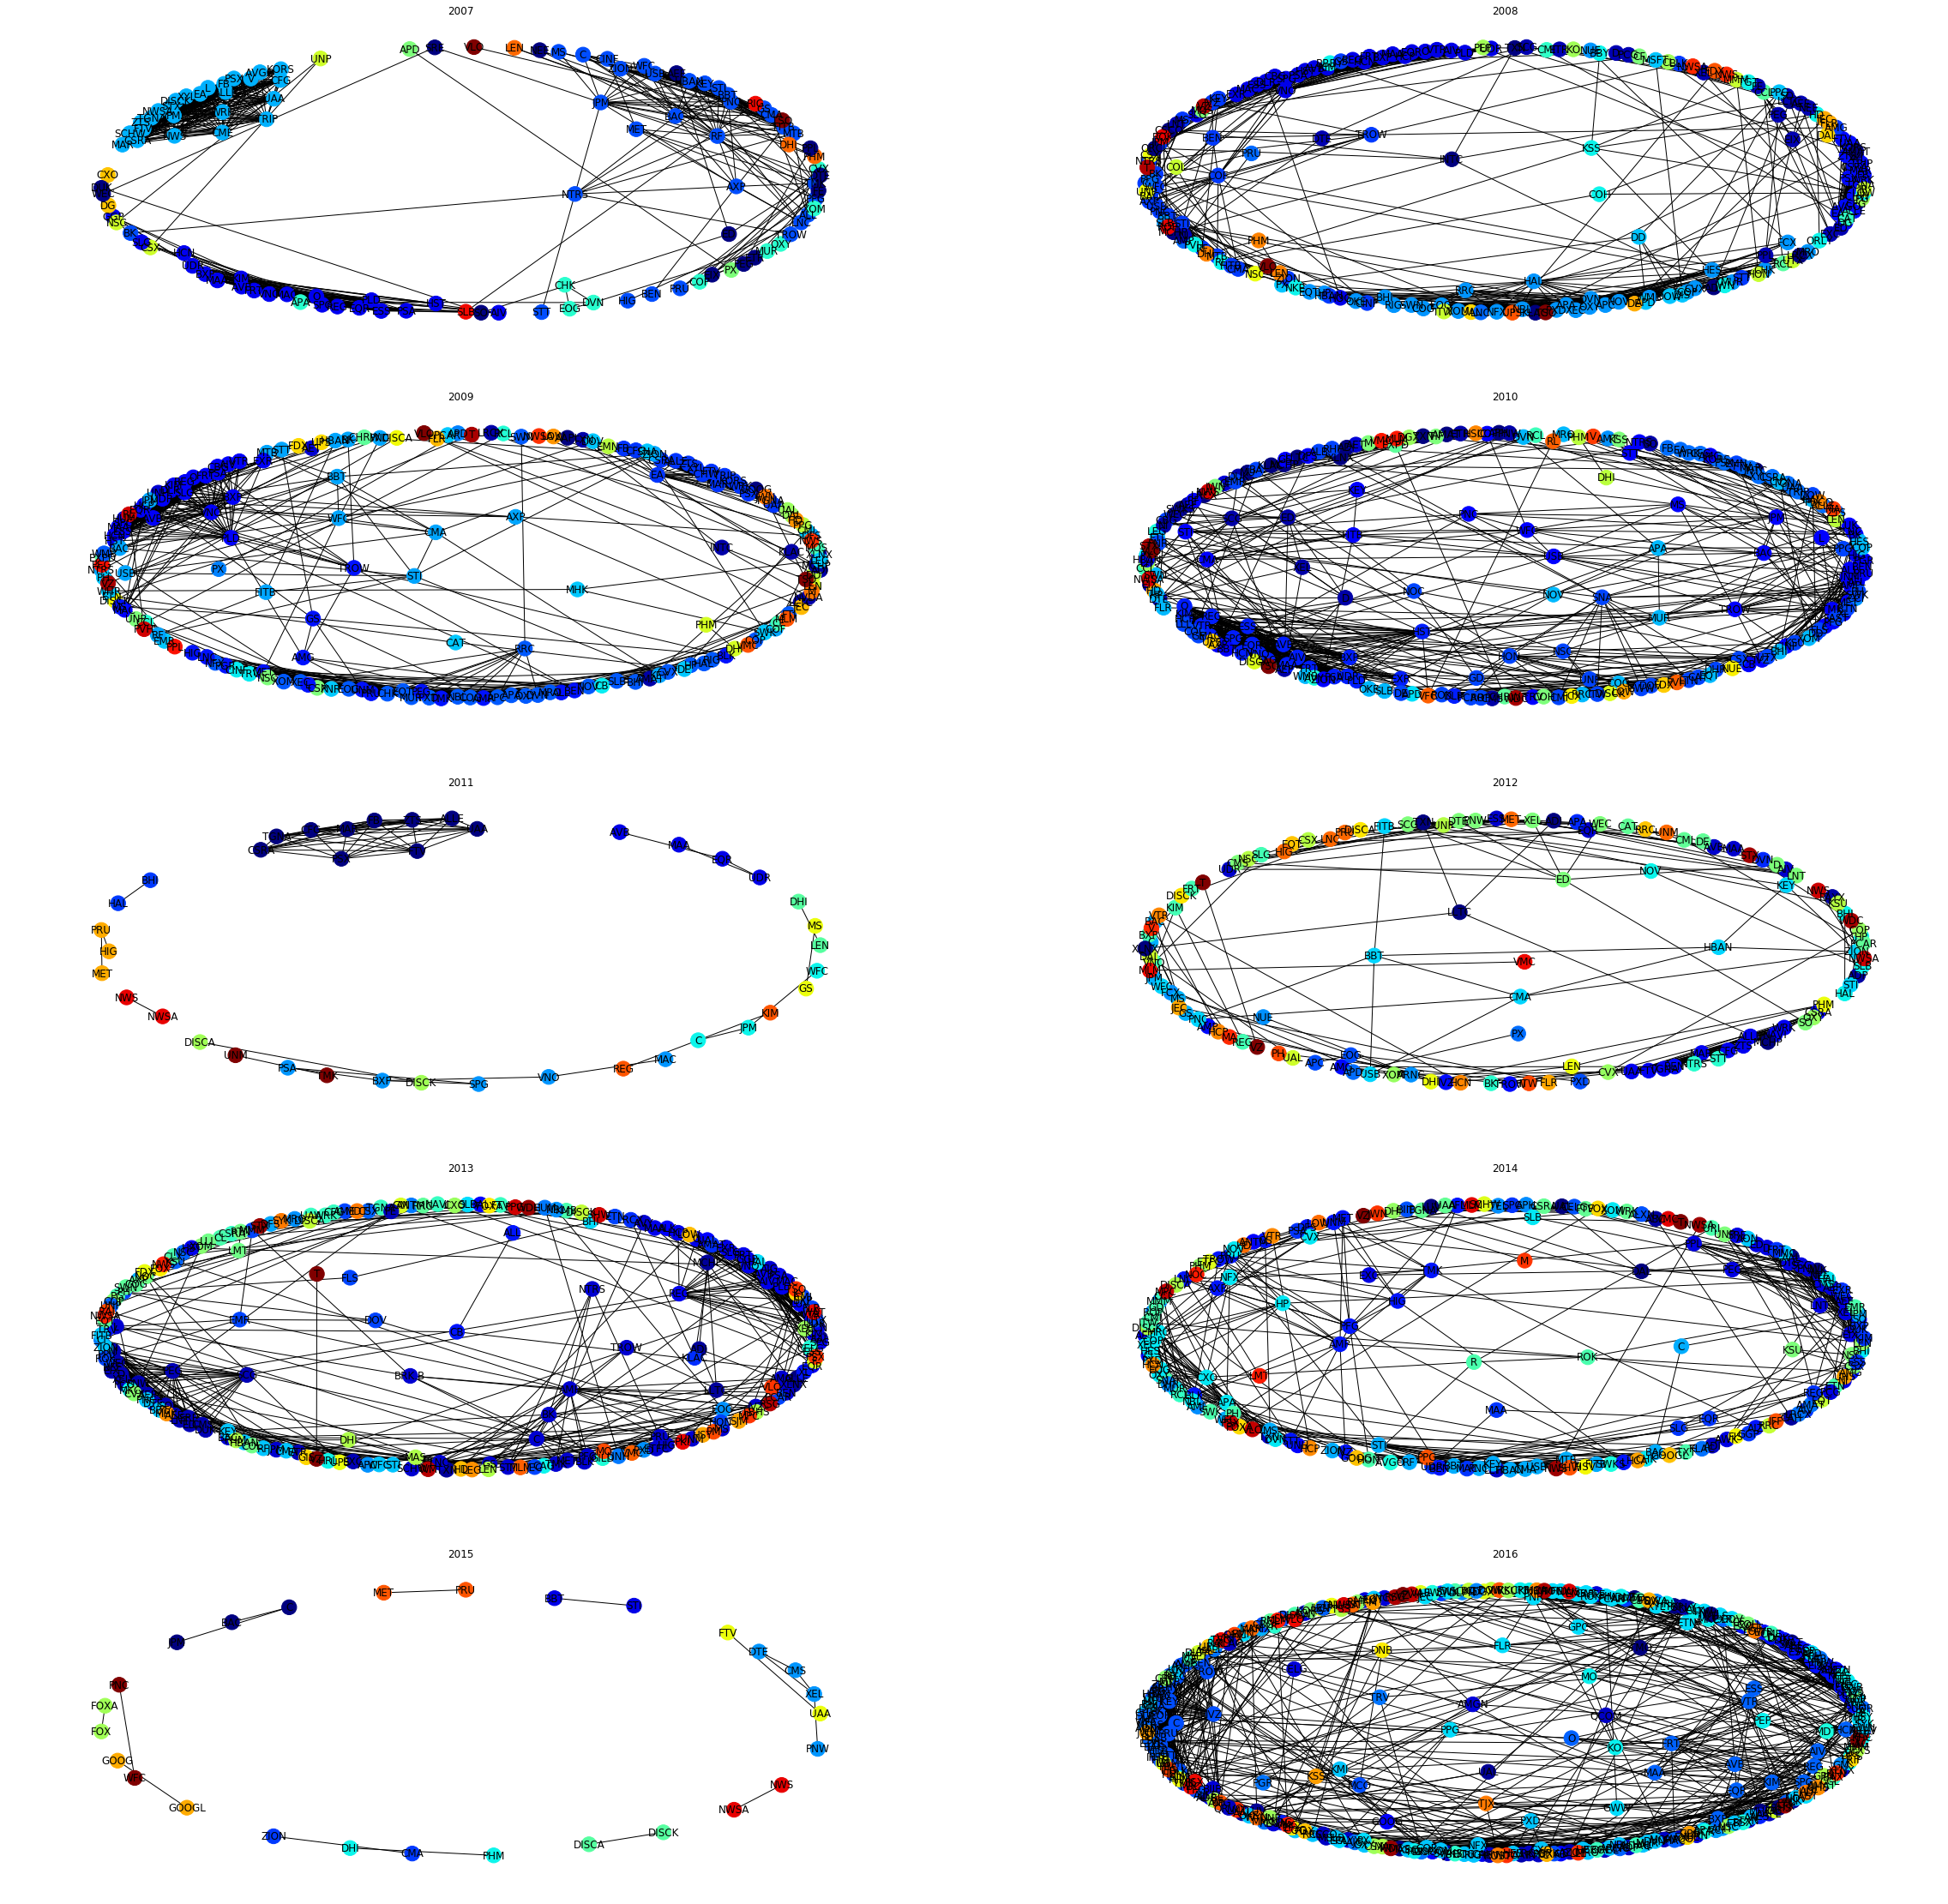

In [40]:
## Explore graph properties
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(40, 40))
y = 0
for row in ax:
    for col in row:
        col.axis('off')
        try:
            T = G_dict[list(G_dict.keys())[y]]
        except:
            continue
        col.set_title( str(list(G_dict.keys())[y]) )
        col.axis('off')
        #Gcc=sorted(nx.connected_component_subgraphs(T), key = len, reverse=True)[0]
        #pos=nx.spring_layout(Gcc)
        #nx.draw_networkx_nodes(Gcc,pos,ax=col,node_size=20)
        #nx.draw_networkx_edges(Gcc,pos,ax=col,alpha=0.4)
        color=nx.get_node_attributes(T,'community')
        values = [color.get(node) for node in T.nodes()]
        nx.draw(T,ax=col,pos=nx.spring_layout(T,k=0.20),with_labels = True,node_color = values,cmap = plt.get_cmap('jet'))
        y = y + 1
plt.show()

In [ ]:
np.log(1 + concatenated_df[concatenated_df['ticker'] == 'AAPL']['pct_change']).plot()

In [43]:
df_price

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,0.000000,0.026778,0.000000,0.000000,0.005711,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.063099,0.000000,0.000000,0.021176,0.000000,-0.015678
2007-01-02,0.000000,0.026778,0.000000,0.000000,0.005711,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.063099,0.000000,0.000000,0.021176,0.000000,-0.015678
2007-01-03,-0.019917,0.026778,-0.003647,-0.029280,0.005711,0.022591,0.002863,-0.004662,-0.019842,-0.002737,...,-0.011790,-0.028598,-0.002331,-0.005900,0.063099,-0.009328,0.001871,0.021176,0.008235,-0.015678
2007-01-04,0.003202,0.026778,0.005039,0.018974,0.005711,0.001297,0.016977,0.029462,0.023297,0.017208,...,0.020904,-0.015420,0.003330,-0.000592,0.063099,0.046112,0.000000,0.021176,0.005780,-0.015678
2007-01-05,-0.006141,0.026778,-0.019231,-0.008433,0.005711,-0.008275,0.000000,-0.001907,-0.003931,-0.007240,...,-0.012036,0.010845,-0.000332,-0.009518,0.063099,0.038212,-0.008726,0.021176,0.001326,-0.015678
2007-01-08,-0.000294,0.026778,-0.000569,-0.005717,0.005711,0.005180,0.005205,0.018991,0.000989,0.003310,...,-0.003727,-0.016789,0.005636,0.018393,0.063099,0.007911,0.001724,0.021176,0.004459,-0.015678
2007-01-09,-0.002056,0.026778,0.005092,0.068400,0.005711,-0.006459,0.007351,0.000539,-0.021716,-0.001203,...,-0.010367,0.003335,0.002979,-0.003531,0.063099,-0.015114,0.003783,0.021176,0.004314,-0.015678
2007-01-10,-0.010038,0.026778,0.007353,0.023467,0.005711,0.004740,0.003379,0.014024,0.001786,0.022728,...,0.024088,-0.011485,0.012242,-0.000589,0.063099,0.043439,-0.004241,0.021176,0.009796,-0.015678
2007-01-11,-0.003850,0.026778,0.021661,-0.001460,0.005711,0.014064,-0.001786,-0.001344,0.012109,0.002068,...,0.013855,-0.000141,0.006184,0.016925,0.063099,0.015183,0.015114,0.021176,0.004922,-0.015678
